<a href="https://colab.research.google.com/github/Eeleven/Ee/blob/main/diffusers_doc/en/pytorch/inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/49 [00:00<?, ?it/s]

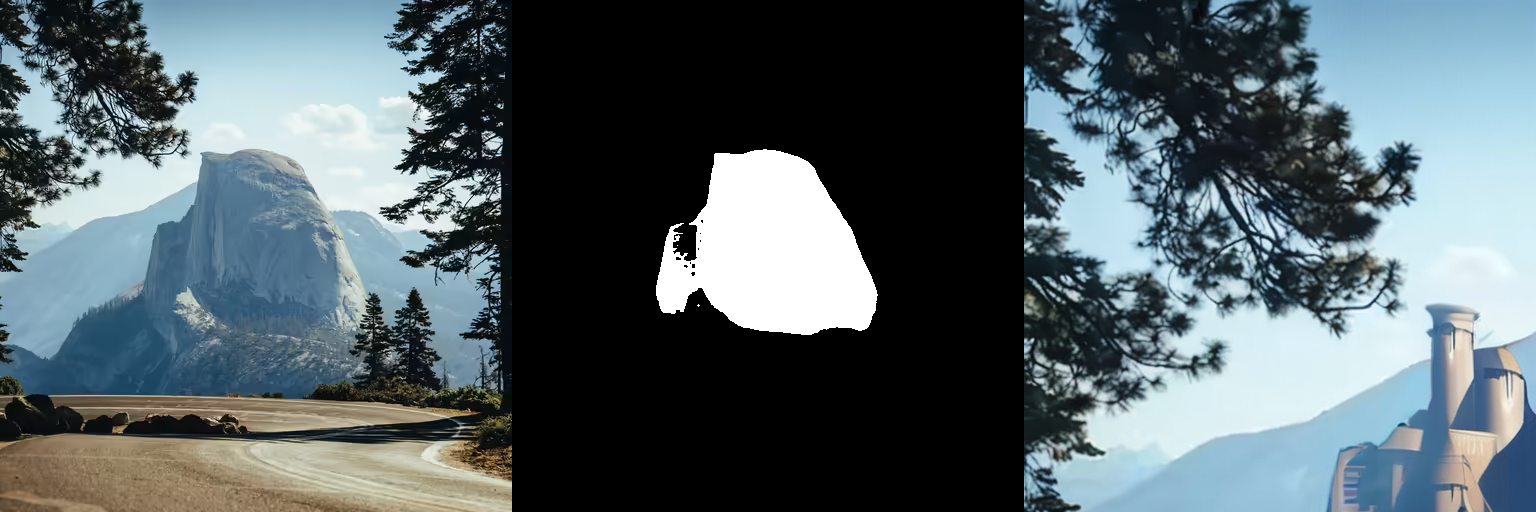

In [2]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# load base and mask image
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

generator = torch.Generator("cuda").manual_seed(92)
# prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
# image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
# make_image_grid([init_image, mask_image, image], rows=1, cols=3)

  0%|          | 0/49 [00:00<?, ?it/s]

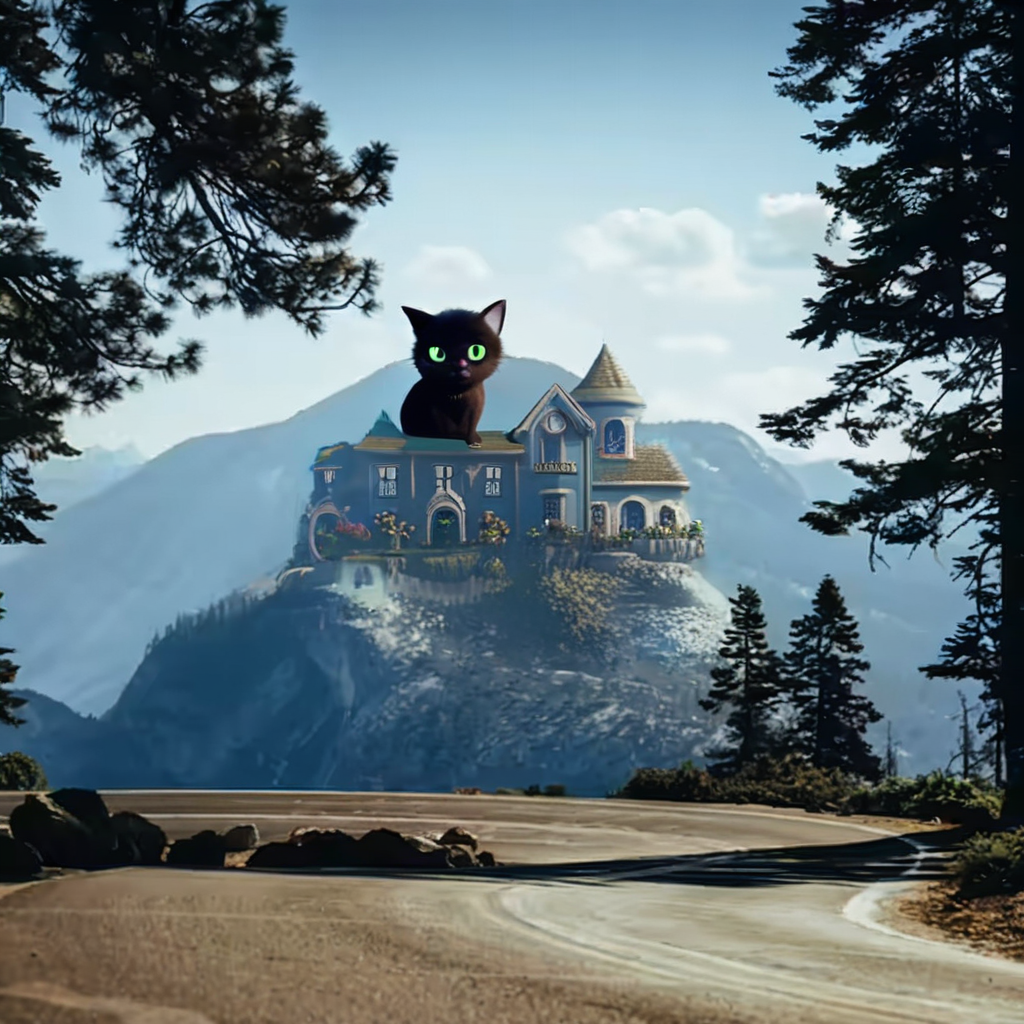

In [5]:

prompt = "a black cat with big eyes, adorable, disney, pixar, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
display(image)

In [1]:
!pip install xformers

Download an image and a mask of a dog which you'll eventually replace:

In [3]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png"
mask_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

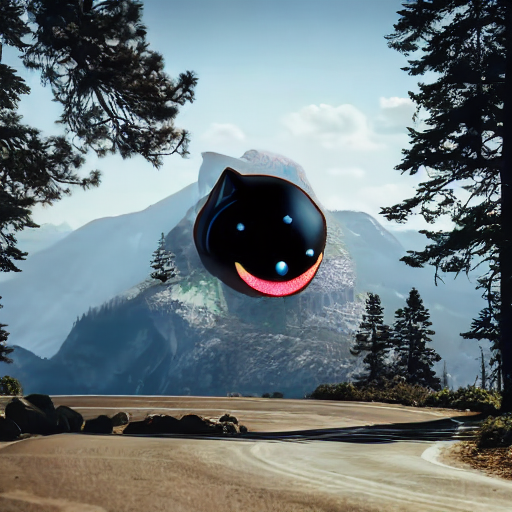

In [6]:
prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
display(image)

`image`          | `mask_image` | `prompt` | output |
:-------------------------:|:-------------------------:|:-------------------------:|-------------------------:|
<img src="https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png" alt="drawing" width="250"/> | <img src="https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png" alt="drawing" width="250"/> | ***Face of a yellow cat, high resolution, sitting on a park bench*** | <img src="https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/in_paint/yellow_cat_sitting_on_a_park_bench.png" alt="drawing" width="250"/> |


<Tip warning={true}>

A previous experimental implementation of inpainting used a different, lower-quality process. To ensure backwards compatibility, loading a pretrained pipeline that doesn't contain the new model will still apply the old inpainting method.

</Tip>

Check out the Spaces below to try out image inpainting yourself!

<iframe
	src="https://runwayml-stable-diffusion-inpainting.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>